# Kickstarter Projects Notebook

## Import Libraries

In [24]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [2]:
dataset_path = "../input/kickstarter-projects/ks-projects-201801.csv"
data = pd.read_csv(dataset_path)
result = data["state"]
data = data[["main_category", "goal", "currency"]]
categorical_data = pd.get_dummies(data[["main_category", "currency"]])
data = pd.concat([data, categorical_data], axis=1)
data["goal"] = data["goal"].astype("int32")
data = data.drop(["main_category", "currency"], axis=1)
parameter_names = np.array(data.columns)

In [3]:
x = data.values
y = result.values
y = np.where(y == "successful", 0, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

## Train Random Forest

In [4]:
parameters = {"n_estimators": [100, 200, 500], "max_depth": [None, 5, 10]}

In [5]:
tree = RandomForestClassifier()
clf = GridSearchCV(tree, parameters, cv=5)

In [6]:
clf = clf.fit(x_train, y_train)

In [7]:
best_parameters = clf.best_params_

In [8]:
tree = RandomForestClassifier(max_depth=best_parameters["max_depth"], n_estimators=best_parameters["n_estimators"])
tree = tree.fit(x_train, y_train)

In [9]:
train_score = tree.score(x_train, y_train)
train_prediction = tree.predict(x_train)
test_score = tree.score(x_test, y_test)
test_prediction = tree.predict(x_test)

In [10]:
print("Train Score: {:.3f}, Test Score: {:.3f}".format(train_score, test_score))

Train Score: 0.667, Test Score: 0.665


In [31]:
train_matrix = confusion_matrix(y_train, train_prediction)
test_matrix = confusion_matrix(y_test, test_prediction)

In [32]:
sns.heatmap(train_matrix, annot=True)
plt.show()

ValueError: `data` and `annot` must have same shape.

In [ ]:
sns.heatmap(test_matrix, annot=True)
plt.show()

## Plot Feature Importances

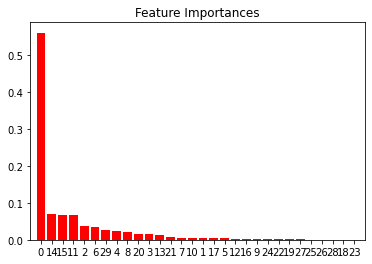

In [15]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices],color="r")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [16]:
parameter_names[0]

'goal'

In [17]:
parameter_names[14]

'main_category_Technology'

In [18]:
parameter_names[15]

'main_category_Theater'